In [ ]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/refs/heads/master/winequality-red.csv")

In [ ]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
X=df.drop("quality",axis=1)
y=df["quality"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
548,12.4,0.35,0.49,2.6,0.079,27.0,69.0,0.9994,3.12,0.75,10.4
355,6.7,0.75,0.01,2.4,0.078,17.0,32.0,0.9955,3.55,0.61,12.8


In [ ]:
X_test.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.5,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.6,0.082,21.0,102.0,0.9960,3.39,0.48,9.5


In [ ]:
y_train.head(2)

,quality
548,6
355,6


In [ ]:
y_test.head(2)

,quality
803,6
124,5


In [ ]:
y_train.value_counts()

,count
quality,
5,464
6,425
7,129
4,34
8,11
3,8


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [ ]:
print(ridge_reg.coef_)

[ 0.00527468 -1.06401552 -0.21653986  0.00740719 -1.09107843  0.00339007
 -0.00296794 -0.01600073 -0.3562811   0.67560346  0.31381541]


In [ ]:
print(ridge_reg.intercept_)

3.847925902377937


In [ ]:
rid_pred=ridge_reg.predict(X_test)

In [ ]:
rid_pred

array([5.36866085, 5.0928997 , 5.58806579, 5.44192195, 5.73863493,
       5.27427044, 5.08152061, 5.1568489 , 5.68750694, 5.71066118,
       6.13098373, 5.25059646, 5.53510351, 5.22857402, 5.42429926,
       6.4848089 , 5.20971548, 5.57301593, 6.51534704, 5.27300095,
       5.47840378, 5.17002666, 6.00512379, 6.43316147, 5.36158163,
       5.40592787, 6.37704273, 5.4064978 , 5.17514178, 6.10835544,
       5.2754361 , 5.58073959, 5.72936278, 5.33974181, 5.46033467,
       5.04153087, 6.1435575 , 5.69327963, 5.56799182, 6.1851864 ,
       5.42653342, 5.26719219, 6.11269943, 5.18667327, 5.77855906,
       5.76419519, 6.34177223, 5.50160064, 5.16490653, 5.57399755,
       5.14102917, 5.20538907, 5.62787986, 6.40822275, 4.98936097,
       4.99479756, 5.99398072, 5.44977894, 5.86578097, 5.26194009,
       5.63769069, 5.94564627, 5.26926764, 5.31919262, 6.45292297,
       5.39374654, 6.32373972, 5.29033307, 6.43189986, 5.29820315,
       6.47473042, 4.74624531, 5.73952555, 5.88384013, 6.20044

In [ ]:
residuals=y_test-rid_pred

In [ ]:
residuals

,quality
803,0.631339
124,-0.092900
350,0.411934
682,-0.441922
1326,0.261365
...,...
813,-2.042259
377,0.227410
898,0.412202
126,0.147174


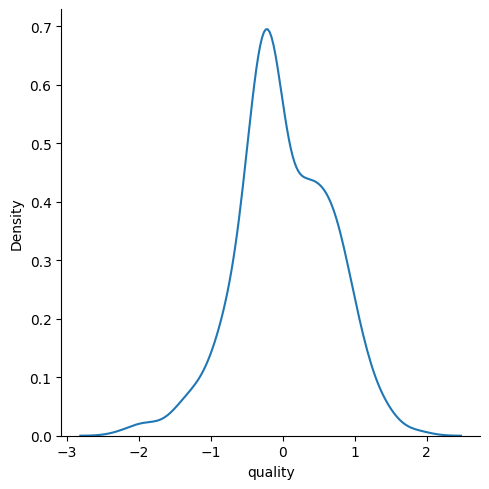

In [ ]:
sns.displot(residuals,kind="kde")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,rid_pred))
print(mean_squared_error(y_test,rid_pred))

0.519005522280895
0.4266339642743733


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,rid_pred)
print(score)

0.35577515750330746


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

Lasso()

In [ ]:
print(lasso_reg.coef_)

[ 0.         -0.          0.          0.         -0.          0.
 -0.00404206 -0.         -0.          0.          0.        ]


In [ ]:
print(lasso_reg.intercept_)

5.810868788793144


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lasso_pred=lasso_reg.predict(X_test)

In [ ]:
lasso_pred

array([5.62493406, 5.39857875, 5.67343878, 5.57642935, 5.67343878,
       5.51984053, 5.21668608, 5.73406966, 5.69364907, 5.69769113,
       5.7502379 , 5.76236408, 5.67343878, 5.6411023 , 5.57642935,
       5.76236408, 5.47941993, 5.60068171, 5.74215378, 5.55621906,
       5.76640614, 5.66939672, 5.70577525, 5.70173319, 5.74619584,
       5.69769113, 5.66939672, 5.63301818, 5.43091522, 5.71790143,
       5.56834524, 5.68152289, 5.71790143, 5.74215378, 5.67343878,
       5.51579847, 5.71385937, 5.74215378, 5.70577525, 5.76640614,
       5.70981731, 5.54005082, 5.75832202, 5.3541161 , 5.73811172,
       5.73406966, 5.72598555, 5.71385937, 5.56834524, 5.7502379 ,
       5.26923285, 5.56026112, 5.76236408, 5.4632517 , 5.56026112,
       5.49963023, 5.71385937, 5.61280789, 5.66535466, 5.68556495,
       5.61684995, 5.74215378, 5.65322848, 5.62493406, 5.70173319,
       5.58047141, 5.74215378, 5.68556495, 5.71385937, 5.49558817,
       5.66535466, 5.54005082, 5.70173319, 5.68960701, 5.70981

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,lasso_pred))
print(mean_squared_error(y_test,lasso_pred))

0.666519922948612
0.6496296277606727


In [ ]:
residuals=y_test-lasso_pred

In [ ]:
residuals

,quality
803,0.375066
124,-0.398579
350,0.326561
682,-0.576429
1326,0.326561
...,...
813,-1.782574
377,1.261888
898,1.362940
126,-0.762364


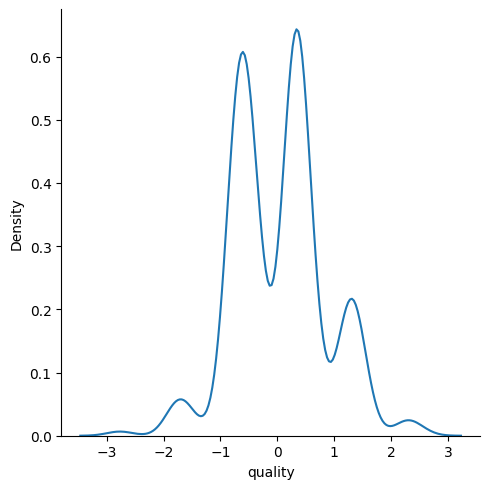

In [ ]:
sns.displot(residuals,kind="kde")

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print(score)

0.019047755991228876


Elasticnet

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [ ]:
print(elastic_reg.coef_)

[ 0.         -0.          0.          0.         -0.          0.
 -0.00449971 -0.         -0.          0.          0.        ]


In [ ]:
print(elastic_reg.intercept_)

5.832270029556975


In [ ]:
residuals=y_test-E_pred

In [ ]:
residuals

,quality
803,0.374717
124,-0.373300
350,0.320720
682,-0.571287
1326,0.320720
...,...
813,-1.800772
377,1.248725
898,1.361217
126,-0.778274


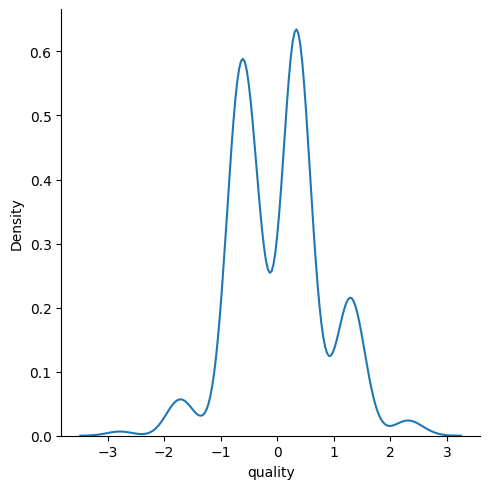

In [ ]:
sns.displot(residuals,kind="kde")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
E_pred=elastic_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,E_pred))
print(mean_squared_error(y_test,E_pred))

0.6637877230211426
0.6501944451466248


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,E_pred)
print(score)

0.01819487173452583
